# Estadística Aplicada

## Alan Fernando Del Real Almaguer

### 9na Sesión 2 de Marzo 2023

In [10]:
# importamos las librerias y el estimador de Kaplan-Meier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
%matplotlib inline

In [2]:
# creamos un diccionario
# pacientes tratados
dic_t = {'tiempo': [12, 19, 20, 20, 33], 
         'evento': [1, 1, 1, 0, 0]}

# pacientes no tratados
dic_n = {'tiempo': [3, 5, 7, 9, 18], 
         'evento': [1, 1, 1, 0, 1]}

In [3]:
# convertimos los diccionarios a dataframes
tratados = pd.DataFrame(dic_t)
no_trat = pd.DataFrame(dic_n)

In [6]:
# mostramos los datos
tratados

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [5]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [11]:
# aplicamos el estimador de Kaplan-Meier para ambos modelos
km_t = KaplanMeierFitter().fit(tratados['tiempo'], tratados['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

In [12]:
# funcion de supervivencia para los pacientes tratados
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [13]:
# funcion de supervivencia para los pacientes no tratados
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [14]:
# tabla completa para los pacientes tratados
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


In [15]:
# tabla completa para los pacientes no tratados
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


d_i es observed, c_i es censored y n_i es at_risk

<AxesSubplot:xlabel='timeline'>

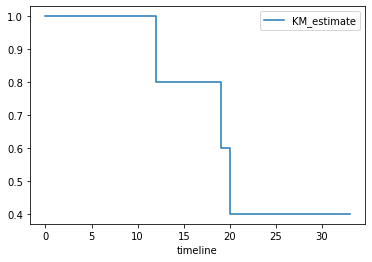

In [16]:
# graficamos la funcion de supervivencia para los tratados
km_t.plot_survival_function(ci_show = False)

<AxesSubplot:xlabel='timeline'>

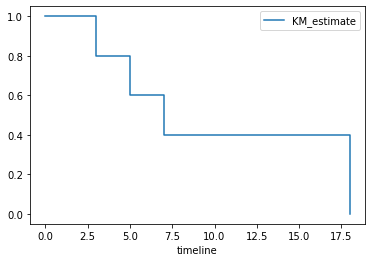

In [17]:
# graficamos la funcion de supervivencia para los no tratados
km_nt.plot_survival_function(ci_show = False)

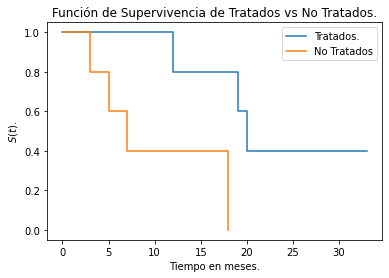

In [20]:
# juntamos ambas graficas para compararlas
km_t.plot_survival_function(label = 'Tratados.', ci_show = False)
km_nt.plot_survival_function(label = 'No Tratados', ci_show = False)
plt.title('Función de Supervivencia de Tratados vs No Tratados.')
plt.ylabel('$S(t)$.')
plt.xlabel('Tiempo en meses.')
plt.show()

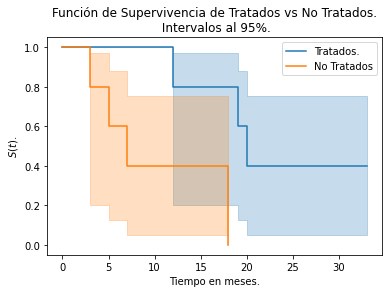

In [23]:
# juntamos ambas graficas para compararlas
km_t.plot_survival_function(label = 'Tratados.')
km_nt.plot_survival_function(label = 'No Tratados')
plt.title('Función de Supervivencia de Tratados vs No Tratados.\n Intervalos al 95%.')
plt.ylabel('$S(t)$.')
plt.xlabel('Tiempo en meses.')
plt.show()

In [27]:
# realizamos una prueba de hipótesis, Long Rank Test (Chi Cuadrada)
from lifelines.statistics import logrank_test

In [28]:
# aplicamos la prueba
lrt = logrank_test(tratados['tiempo'], tratados['evento'],
                  no_trat['tiempo'], no_trat['evento'])

In [30]:
# imprimimos un resumen
lrt.print_summary()

C:\Users\LENOVO\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

p-value < $\alpha$, rechazamos H0

Conclusión: a un 95% de confianza rechazamos H0. Lo que significa que las funciones de supervivencia de los pacientes tratados y no tratados son distintas.

In [31]:
# mediana del modelo de los pacientes tratados
km_t.median_survival_time_

20.0

In [33]:
# mediana del modelo de los pacientes no tratados
km_nt.median_survival_time_

7.0

La mediana del modelo de los pacientes tratados es de 20, lo que significa que el 50% de los pacientes sobrevive mas de 20 meses.

La mediana del modelo de los pacientes tratados es de 7, lo que significa que el 50% de los pacientes sobrevive mas de 7 meses.

In [34]:
# Realizamos lo mismo con el modelo exponencial
from lifelines import ExponentialFitter

In [35]:
# para los pacientes tratados
exp_t = ExponentialFitter().fit(tratados['tiempo'], tratados['evento'])

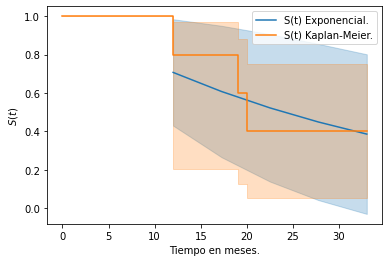

In [38]:
# graficamos para los pacientes tratados junto a la de Kaplan-Meier
exp_t.plot_survival_function(label = 'S(t) Exponencial.')
km_t.plot_survival_function(label = 'S(t) Kaplan-Meier.')
plt.xlabel('Tiempo en meses.')
plt.ylabel('$S(t)$')
plt.show()